In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Flatten, Dense, Input
from glob import glob
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
test_path = 'Datasets/test'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob('Datasets/train/*')

In [6]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode='categorical')
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
163/163 [==============================] - 3523s 22s/step - loss: 0.1713 - accuracy: 0.9342 - val_loss: 0.3462 - val_accuracy: 0.8974
Epoch 2/2
163/163 [==============================] - 3045s 19s/step - loss: 0.1146 - accuracy: 0.9557 - val_loss: 0.4226 - val_accuracy: 0.9054


In [20]:
model.save('pneumonia.h5')

Result is Normal


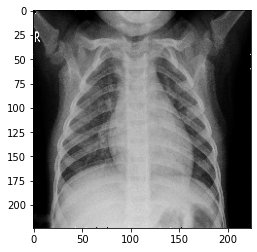

In [19]:
img = image.load_img('Datasets/val/Normal/NORMAL2-IM-1436-0001.jpeg', target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")
plt.imshow(img)